### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
current_palette = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import clear_output
sns.set_style('darkgrid')
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,34))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


### Obtain

In [2]:
df = pd.read_csv('obtain.csv',index_col=0)

In [3]:
data = df
transfer_df = pd.get_dummies(data.DRG_label )
data.drop(columns='DRG_label')
data = data.drop(columns=['DRG_label'])
for i in transfer_df.columns:
    data[i] = transfer_df[i]

In [4]:
drop_columns =[]
for i in data.columns:
    if data[i].dtype == object:
        drop_columns.append(i)
data = data.drop(columns=drop_columns)


In [5]:
data.head()

,SEX_AND_AGE_Total_population,Percent_SEX_AND_AGE_Total_population_Male,Percent_SEX_AND_AGE_Total_population_Female,SEX_AND_AGE_Total_population_Sex_ratio_(males_per_100_females),Percent_SEX_AND_AGE_Total_population_Under_5_years,Percent_SEX_AND_AGE_Total_population_5_to_9_years,Percent_SEX_AND_AGE_Total_population_10_to_14_years,Percent_SEX_AND_AGE_Total_population_15_to_19_years,Percent_SEX_AND_AGE_Total_population_20_to_24_years,Percent_SEX_AND_AGE_Total_population_25_to_34_years,...,RENAL FAILURE,RESPIRATORY INFECTIONS & INFLAMMATIONS,RESPIRATORY SYSTEM DIAGNOSIS,SEIZURES,SEPTICEMIA OR SEVERE SEPSIS,SIGNS & SYMPTOMS,SIMPLE PNEUMONIA & PLEURISY,SPINAL FUSION EXCEPT CERVICAL,SYNCOPE & COLLAPSE,TRANSIENT ISCHEMIA
0,659460,47.4,52.6,90.0,6.5,6.5,6.2,6.3,6.6,14.4,...,0,0,0,0,0,0,0,0,0,0
1,659460,47.4,52.6,90.0,6.5,6.5,6.2,6.3,6.6,14.4,...,0,0,0,0,0,0,0,0,0,0
2,659460,47.4,52.6,90.0,6.5,6.5,6.2,6.3,6.6,14.4,...,0,0,0,0,0,0,0,0,0,0
3,659460,47.4,52.6,90.0,6.5,6.5,6.2,6.3,6.6,14.4,...,0,0,0,0,0,0,0,0,0,0
4,659460,47.4,52.6,90.0,6.5,6.5,6.2,6.3,6.6,14.4,...,0,0,0,0,0,0,0,0,0,0


In [38]:
target_column='ratio_to_max_payment'
#y = pd.cut(data[target_column],).astype(str)
y= data.ratio_to_max_payment >= data.ratio_to_max_payment.std()*1.5+data.ratio_to_max_payment.mean()
X = data.drop(columns=[target_column])
data_train, data_test, target_train, target_test = train_test_split(X, y, 
                                                                    test_size = 0.25)


forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5)
forest.fit(data_train,target_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
forest.score(data_train,target_train)


0.9337090792278714

In [40]:
forest.score(data_test,target_test)

0.933039364560215

In [41]:
df_feature_importance = pd.Series(data = forest.feature_importances_, index= X.columns).sort_values(ascending=False)

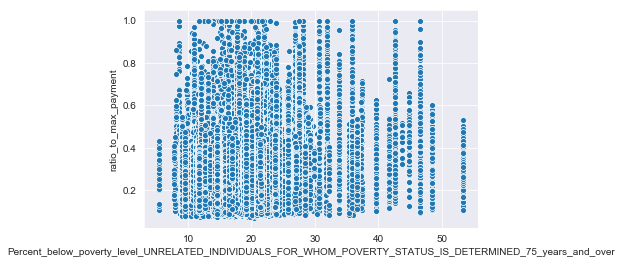

In [42]:
sns.scatterplot(x=df_feature_importance.index[0], y= target_column, data = data )

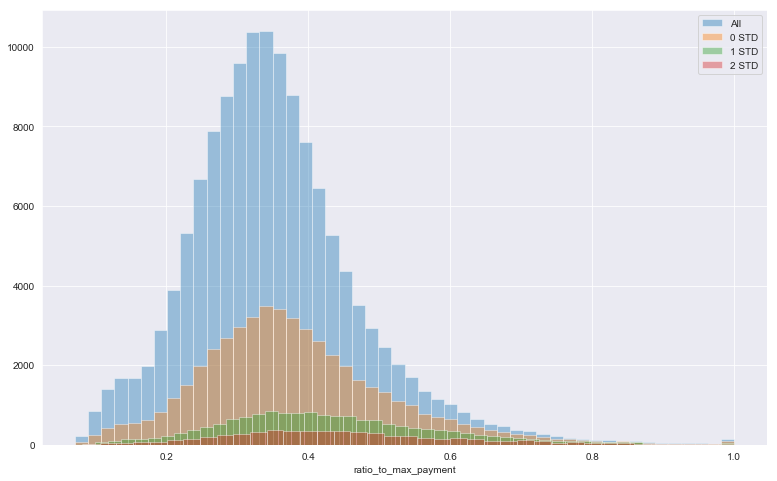

In [43]:
col = df_feature_importance.index[0]
plt.figure(figsize=(13,8))
sns.distplot(data[target_column], label = 'All', kde = False)

for i in [0, 1 ,2]:
    sns.distplot(data.loc[(data[col] >= data[col].mean()+ data[col].std()* i)][target_column], label = f"{i} STD", kde=False)
plt.legend()

In [46]:
df_feature_importance[:12]

Percent_below_poverty_level_UNRELATED_INDIVIDUALS_FOR_WHOM_POVERTY_STATUS_IS_DETERMINED_75_years_and_over    0.028821
_Average_Total_Payments_                                                                                     0.028048
Nonfamily_households_Total                                                                                   0.027385
Percent_Race_alone_or_in_combination_with_one_or_more_other_races_Total_population_White                     0.025408
Total_housing_units                                                                                          0.024851
Nonfamily_households_$25,000_to_$34,999                                                                      0.024310
Households_Total                                                                                             0.022929
Percent_RACE_Total_population_One_race_White                                                                 0.022571
Percent_RACE_Total_population_One_race_Asian_Chinese    